# Setup

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
plt.style.use("ggplot")
sns.set(font_scale=1.1)

# Reproducibility
np.random.seed(42)

# Display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)

# Load Merged Flow Comparison Data

In [3]:
merged_df = pd.read_csv("../data/merged_flow_comparison.csv", parse_dates=["date"])

# Preview the data
merged_df.head()

,ticker_id,provider,date,inflow_internal,outflow_internal,net_flow_internal,inflow_mstar,outflow_mstar,net_flow_mstar,inflow_bbg,outflow_bbg,net_flow_bbg,inflow_abs_diff_mstar,inflow_rel_diff_mstar,outflow_abs_diff_mstar,outflow_rel_diff_mstar,net_flow_abs_diff_mstar,net_flow_rel_diff_mstar,inflow_abs_diff_bbg,inflow_rel_diff_bbg,outflow_abs_diff_bbg,outflow_rel_diff_bbg,net_flow_abs_diff_bbg,net_flow_rel_diff_bbg
0,SPY,BlackRock,2024-01-01,2.093163e+08,1.711885e+08,3.812775e+07,2.164655e+08,1.716837e+08,4.478182e+07,2.114814e+08,1.739297e+08,3.755168e+07,7149213.04,0.0342,495145.07,0.0029,6654067.97,0.1745,2165120.80,0.0103,2741188.04,0.0160,576067.24,0.0151
1,SPY,BlackRock,2024-01-02,1.660922e+07,2.476862e+08,-2.310770e+08,1.810183e+07,2.489855e+08,-2.308836e+08,1.947456e+07,2.500563e+08,-2.305818e+08,1492609.43,0.0899,1299285.14,0.0052,193324.29,-0.0008,2865347.26,0.1725,2370147.20,0.0096,495200.06,-0.0021
2,SPY,BlackRock,2024-01-03,1.718910e+08,2.024759e+08,-3.058490e+07,1.735013e+08,2.039746e+08,-3.047328e+07,1.724224e+08,2.026410e+08,-3.021860e+07,1610341.92,0.0094,1498723.25,0.0074,111618.67,-0.0036,531410.90,0.0031,165115.98,0.0008,366294.92,-0.0120
3,SPY,BlackRock,2024-01-04,5.199350e+07,5.244518e+07,-4.516759e+05,5.293818e+07,5.358740e+07,-6.492210e+05,5.349211e+07,5.365269e+07,-1.605745e+05,944678.57,0.0182,1142223.68,0.0218,197545.11,-0.4374,1498612.27,0.0288,1207510.89,0.0230,291101.38,-0.6445
4,SPY,BlackRock,2024-01-05,8.699916e+07,1.500560e+08,-6.305682e+07,9.462874e+07,1.516885e+08,-5.705972e+07,8.821870e+07,1.556575e+08,-6.743878e+07,7629583.10,0.0877,1632479.93,0.0109,5997103.17,-0.0951,1219546.70,0.0140,5601504.10,0.0373,4381957.40,-0.0695


# Flag and Rank Discrepancies

In [4]:
threshold = 0.10  # 10%

# Add boolean flags
for source in ["mstar", "bbg"]:
    for metric in ["inflow", "outflow", "net_flow"]:
        rel_col = f"{metric}_rel_diff_{source}"
        flag_col = f"{metric}_flag_{source}"
        merged_df[flag_col] = merged_df[rel_col] > threshold

# Count flags per row (how many metrics are out of spec)
merged_df["num_flags_mstar"] = merged_df[[f"{m}_flag_mstar" for m in ["inflow", "outflow", "net_flow"]]].sum(axis=1)
merged_df["num_flags_bbg"] = merged_df[[f"{m}_flag_bbg" for m in ["inflow", "outflow", "net_flow"]]].sum(axis=1)

# Preview rows with highest number of Morningstar flags
merged_df.sort_values("num_flags_mstar", ascending=False).head()

,ticker_id,provider,date,inflow_internal,outflow_internal,net_flow_internal,inflow_mstar,outflow_mstar,net_flow_mstar,inflow_bbg,outflow_bbg,net_flow_bbg,inflow_abs_diff_mstar,inflow_rel_diff_mstar,outflow_abs_diff_mstar,outflow_rel_diff_mstar,net_flow_abs_diff_mstar,net_flow_rel_diff_mstar,inflow_abs_diff_bbg,inflow_rel_diff_bbg,outflow_abs_diff_bbg,outflow_rel_diff_bbg,net_flow_abs_diff_bbg,net_flow_rel_diff_bbg,inflow_flag_mstar,outflow_flag_mstar,net_flow_flag_mstar,inflow_flag_bbg,outflow_flag_bbg,net_flow_flag_bbg,num_flags_mstar,num_flags_bbg
6862,BND,Charles Schwab,2024-10-01,41346119.38,28785717.27,12560402.11,48755177.77,32973983.34,15781194.43,51809935.75,30761019.56,21048916.19,7409058.39,0.1792,4188266.07,0.1455,3220792.32,0.2564,10463816.37,0.2531,1975302.29,0.0686,8488514.08,0.6758,True,True,True,True,False,True,3,2
13731,VTSAX,BlackRock,2024-07-08,18562330.82,14185165.57,4377165.25,21641283.98,16113711.72,5527572.26,19759088.30,15568655.25,4190433.05,3078953.16,0.1659,1928546.15,0.1360,1150407.01,0.2628,1196757.48,0.0645,1383489.68,0.0975,186732.20,0.0427,True,True,True,False,False,False,3,0
50540,LOW,BlackRock,2024-02-02,10071958.41,9018393.46,1053564.95,11984234.68,11610467.63,373767.05,12201418.21,11817539.20,383879.01,1912276.27,0.1899,2592074.17,0.2874,679797.90,0.6452,2129459.80,0.2114,2799145.74,0.3104,669685.94,0.6356,True,True,True,True,True,True,3,3
42403,TXN,Charles Schwab,2024-11-09,12173275.73,10512634.79,1660640.94,15740165.44,11977648.84,3762516.60,12517189.05,14169485.04,-1652295.99,3566889.71,0.2930,1465014.05,0.1394,2101875.66,1.2657,343913.32,0.0283,3656850.25,0.3479,3312936.93,1.9950,True,True,True,False,True,True,3,2
13744,VTSAX,BlackRock,2024-07-21,10664231.53,1306065.38,9358166.15,15682417.02,3371917.17,12310499.85,15143477.71,2859010.77,12284466.94,5018185.49,0.4706,2065851.79,1.5817,2952333.70,0.3155,4479246.18,0.4200,1552945.39,1.1890,2926300.79,0.3127,True,True,True,True,True,True,3,3


# Visualize Discrepancies by Provider

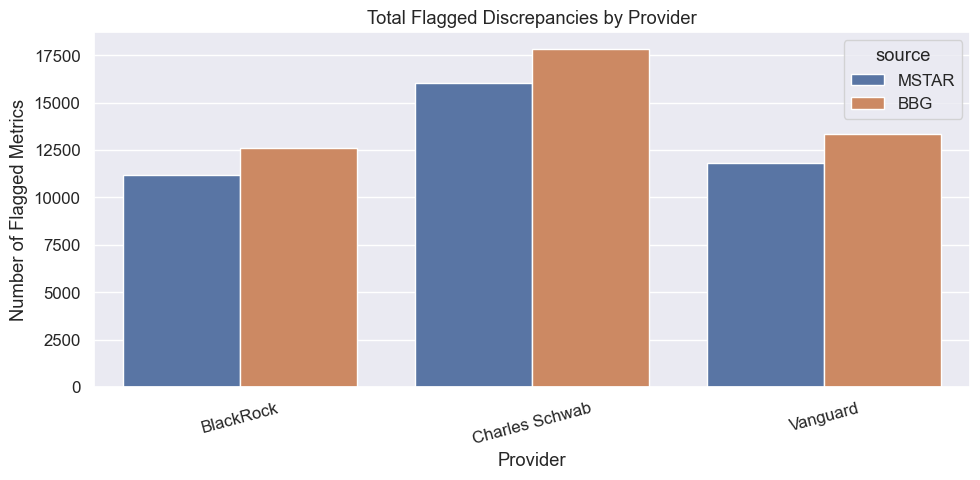

In [5]:
# Sum flag counts per provider
flag_summary = merged_df.groupby("provider")[["num_flags_mstar", "num_flags_bbg"]].sum().reset_index()

# Rename for plotting
flag_summary = flag_summary.melt(id_vars="provider", var_name="source", value_name="flag_count")
flag_summary["source"] = flag_summary["source"].str.replace("num_flags_", "").str.upper()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=flag_summary, x="provider", y="flag_count", hue="source")
plt.title("Total Flagged Discrepancies by Provider")
plt.ylabel("Number of Flagged Metrics")
plt.xlabel("Provider")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Export Flagged Dependencies

In [6]:
# Filter for rows where either source has any flags
flagged_rows = merged_df[
    (merged_df["num_flags_mstar"] > 0) | (merged_df["num_flags_bbg"] > 0)
].copy()

# Optional: keep a tidy set of columns
flagged_export = flagged_rows[[
    "ticker_id", "provider", "date",
    "net_flow_internal", "net_flow_mstar", "net_flow_bbg",
    "net_flow_rel_diff_mstar", "net_flow_rel_diff_bbg",
    "num_flags_mstar", "num_flags_bbg"
]]

# Save to CSV
flagged_path = "../data/flagged_discrepancy_rows.csv"
flagged_export.to_csv(flagged_path, index=False)

flagged_path

'../data/flagged_discrepancy_rows.csv'